### EV Charging Infrastructure Analysis

### Project Overview
This project analyzes global EV charging station distribution with focus on CCS (Type 2) charger availability. The analysis identifies infrastructure patterns across countries and operators to support strategic network expansion decisions.

Aim: The aim of this project Analyse the distribution,availability,and growth of EV Charging stations based on different connecter types,with a particular on different connecter types with a particular focus on CSS(Type 2) chargers.The primary goal of clean project seeks to identify patterns across countries,operators and time period to understand how EV infrastructure is developing and to support decisions that can improve charging accessibility and network expansion

# DATA LOADING AND INITIAL OVERVIEW

## Insatall and import pandas library
Before loading the dataset, we need to ensure that the required Python libraries are installed. The main library used for data manipulation and analysis is Pandas.

In [1]:
pip install pandas

In [1]:
import pandas as pd

## Load The Dataset
Reads the csv file into a DataFrame named df

In [3]:
 file_path = r"C:\Users\ASUS\Downloads\ev_stations_2025.csv"
 df = pd.read_csv(file_path)
 print("Dataset Loaded Successfully")

Dataset Loaded Successfully


## Initial Data Overview

In [ ]:
df

In [ ]:
 # Number of rows and columns
 print(f"Dataset Shape (Rows, columns):{df.shape}")

In [ ]:
 # Data types of each columns
 print("\nData Types:")
 print(df.dtypes)

## Basic information about the data set

In [ ]:
 print("\nDataset Info")
 df.info()

In [ ]:
 print("\nFirst 5 Rows")
 print(df.head())

In [ ]:
 # Descriptive Statistics
 print("\nDescriptive Statistics")
 print(df.describe(include="all"))

# DATA PRE-PROCESSING

## Handling Missing Values
identify and handling missing or null entries

In [ ]:
 print("Missing Values Summary:")
 (df.isnull().sum().sort_values(ascending=False))

Drop null entries address and conncector_types columns

In [ ]:
 df.dropna(subset=["address"],inplace=True)
 df.dropna(subset=["connector_types"],inplace=True)

Cleanly remove “Unknown” while keeping valid connector types perfect Aggregations and Visulaization

In [ ]:
df['connector_types'] = (df['connector_types']
    .str.split('|')                      # split into list
    .apply(lambda x: [i for i in x if i != 'Unknown'])  # remove Unknown
    .str.join('|') )                      # join back

Two different types of unknown operator replace or change unknown.

In [ ]:
# Standardize unknown operator names
df["operator"].replace({
    "(Unknown Operator)": "Unknown",
    "Unknown Operator": "Unknown"
},inplace=True)

In [ ]:
df["operator"].value_counts().head(30)

Fill missing categorical values appropriately

In [ ]:
 df["operator"].fillna("(Unknown Operator)",inplace=True)
 df["state"].fillna("Not_Applicable",inplace=True)
 df["postcode"].fillna("Unknown",inplace=True)
 df["town"].fillna("Unknown",inplace=True)

## Check and Remove Duplicates

Each id should have unique.Ensure no duplicates id are present.

In [ ]:
 duplicate_count = df.duplicated(subset=["id"]).sum()
 print(f"Number of duplicate:{duplicate_count}")

There is no duplicates values present in our dataset

## Correcting data types 

Verify dates and categorical fields have appropriate formats.

In [ ]:
 # Convert date_added columns to datetime
 df["date_added"] = pd.to_datetime(df["date_added"],errors = "coerce")

In [ ]:
 # Confirm Changes
 print(df.dtypes)

## Create derived columns 

Extract componenets from datetime for better analysis

In [ ]:
 df["added_month"] = df["date_added"].dt.month_name()
 df["added_day"] = df["date_added"].dt.day
 df["added_hour"] = df["date_added"].dt.hour
 df["added_minute"] = df["date_added"].dt.minute
 df["day_of_week"] = df["date_added"].dt.day_name()

In [ ]:
 # Calculate station age(if you have current date)
 current_date = pd.Timestamp.now().tz_localize(None)
 df["date_added"] = pd.to_datetime(df["date_added"]).dt.tz_localize(None)
 df["days_since_added"] = (current_date - df["date_added"]).dt.days
 

In [ ]:
 # Preview new derived columns
 print("\nFirst 5 rows with new derived columns:")
 df[["added_month","added_day","added_hour","added_minute","day_of_week","days_since_added"]].head()

Operations

In [ ]:
 # Fast chargers
 fast_mask = df["connector_types"].str.contains("CCS|NACS|GB-?T DC|CHAdeMO",case = False,na = False)
 fast_chargers =  df[fast_mask]  

 # Slow/ Ac chargers(Type1,Type2,CEE,Schuko)
 slow_mask = df["connector_types"].str.contains("Type 1|Type 2|CEE|Schuko",case = False,na = False)
 slow_chargers = df[slow_mask]

In [ ]:
 # identifying large charging hubs
 large_sites = df[df["num_connectors"] > 2]

In [ ]:
 # Stations per Operator
 stations_by_operator = ( df.groupby("operator", as_index=False)["id"].count() .rename(columns={"id": "total_stations"})
                       .sort_values("total_stations", ascending=False))

In [ ]:
 # Stations per Country
 stations_by_country = (df.groupby("country", as_index=False)["id"].count().rename(columns={"id": "total_stations"})
                      .sort_values("total_stations", ascending=False))

In [ ]:
 # Average Connectors Per Operator
 avg_connectors_by_operator = (df.groupby("operator", as_index=False)["num_connectors"].mean()
                             .rename(columns={"num_connectors": "avg_connectors"}).sort_values("avg_connectors", ascending=False))

This will help with 👇:

🔹 Fast-charging analysis

🔹Stations with more than 2 connectors

🔹 Identify high-capacity stations

🔹 Evaluate countries’ EV readiness

🔹 Compare operator infrastructure quality

## Save Cleaned Dataset
Export cleaned data for Phase 3.

In [28]:
 df.to_csv("cleaned_ev_stations_2025_data.csv",index=False)
 print("Cleaned dataset save as cleaned_ev_stations_2025_data.csv ")

Cleaned dataset save as cleaned_ev_stations_2025_data.csv 


In [29]:
 # summaries 
 print("Fast chargers:\n")
 print(fast_chargers.head()) 

Fast chargers:

       id                                              title  \
0  462769                    Electra - Wambrechies - Volfoni   
1  462768                       Electra - Tourcoing - Action   
2  462767  Electra - Bondues - Sure Hotel by Best Western...   
3  462766                 Electra - Bousbecque - Intermarché   
4  462765                    Electra - Halluin - Intermarché   

                 address         town           state postcode country  \
0    81 Av. Clément Ader  Wambrechies  Not_Applicable    59118      FR   
1     185 rue du Touquet    Tourcoing  Not_Applicable    59200      FR   
2  3 Av. Henri Becquerel      Bondues  Not_Applicable    59910      FR   
3              Rue Auger   Bousbecque  Not_Applicable    59166      FR   
4     Boulevard de Roncq      Halluin  Not_Applicable    59250      FR   

         lat       lon operator       status  num_connectors  \
0  50.685653  3.062410  Electra  Operational               2   
1  50.723171  3.180636  El

In [30]:
 print("Slow/ Ac chargers:\n")
 print(slow_chargers.head())

Slow/ Ac chargers:

       id                                              title  \
0  462769                    Electra - Wambrechies - Volfoni   
1  462768                       Electra - Tourcoing - Action   
2  462767  Electra - Bondues - Sure Hotel by Best Western...   
3  462766                 Electra - Bousbecque - Intermarché   
4  462765                    Electra - Halluin - Intermarché   

                 address         town           state postcode country  \
0    81 Av. Clément Ader  Wambrechies  Not_Applicable    59118      FR   
1     185 rue du Touquet    Tourcoing  Not_Applicable    59200      FR   
2  3 Av. Henri Becquerel      Bondues  Not_Applicable    59910      FR   
3              Rue Auger   Bousbecque  Not_Applicable    59166      FR   
4     Boulevard de Roncq      Halluin  Not_Applicable    59250      FR   

         lat       lon operator       status  num_connectors  \
0  50.685653  3.062410  Electra  Operational               2   
1  50.723171  3.180636

In [31]:

print("identifying large charging hubs:\n")
print(large_sites.head())

identifying large charging hubs:

        id                         title             address       town  \
1   462768  Electra - Tourcoing - Action  185 rue du Touquet  Tourcoing   
61  462648                   Lidl Kerava   Santaniitynkatu 7     Kerava   
63  462645                 Prisma Kerava       Kauppakaari 2     Kerava   
69  462633               S-Market Hyrylä       Hyrylänkatu 6    Tuusula   
80  462617      K-Supermarket Kellokoski  Vanha valtatie 189    Tuusula   

             state postcode country        lat        lon         operator  \
1   Not_Applicable    59200      FR  50.723171   3.180636          Electra   
61         Uusimaa    04250      FI  60.399695  25.111991             Lidl   
63         Uusimaa    04200      FI  60.401385  25.102482  ABC Lataus (FI)   
69         Uusimaa    04300      FI  60.397189  25.019503  ABC Lataus (FI)   
80         Uusimaa    04500      FI  60.530799  25.110221         K Lataus   

         status  num_connectors  \
1   Operati

In [32]:
 print("Maket Share by Operator:\n")
 print(stations_by_operator.head())

Maket Share by Operator:

               operator  total_stations
41   Circuit Electrique            1979
33          ChargePoint            1275
258                 flo             724
2    (Unknown Operator)             598
181             PowerGo             421


In [33]:
 print("Ev charging density by country:\n")
 print(stations_by_country.head())

Ev charging density by country:

   country  total_stations
10      CA            4135
67      US            2266
23      ES             887
60      RU             392
49      MY             377


In [34]:
 print("Analyse which operator builds the biggest stations:\n")
 print(avg_connectors_by_operator.head())

Analyse which operator builds the biggest stations:

                   operator  avg_connectors
148                     MER           6.000
234             WeVolt (AU)           6.000
39              Chargy (LU)           5.000
74   Eldrive Lithuania (LT)           4.375
208        Swisscharge (CH)           4.000


## Display Cleaned Dataset Summary 


  Shape of the dataset: Number of rows and columns.

  Column info: Data types and non-null counts using info.

  Missing values check: Ensure no missing values remain.

  Unique values in categorical columns: Confirm encoding and category distribution.

In [35]:
 print("After Cleaned Dataset Details\n")

 print(f"Shape of the dataset:{df.shape}\n")

After Cleaned Dataset Details

Shape of the dataset:(9994, 20)



In [36]:
 print("First 5 rows of the cleaned dataset:")
 print(df.head()) 

First 5 rows of the cleaned dataset:
       id                                              title  \
0  462769                    Electra - Wambrechies - Volfoni   
1  462768                       Electra - Tourcoing - Action   
2  462767  Electra - Bondues - Sure Hotel by Best Western...   
3  462766                 Electra - Bousbecque - Intermarché   
4  462765                    Electra - Halluin - Intermarché   

                 address         town           state postcode country  \
0    81 Av. Clément Ader  Wambrechies  Not_Applicable    59118      FR   
1     185 rue du Touquet    Tourcoing  Not_Applicable    59200      FR   
2  3 Av. Henri Becquerel      Bondues  Not_Applicable    59910      FR   
3              Rue Auger   Bousbecque  Not_Applicable    59166      FR   
4     Boulevard de Roncq      Halluin  Not_Applicable    59250      FR   

         lat       lon operator       status  num_connectors  \
0  50.685653  3.062410  Electra  Operational               2   
1  50

In [37]:
 print("\nDataset Info:")
 df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                9994 non-null   int64         
 1   title             9994 non-null   object        
 2   address           9994 non-null   object        
 3   town              9994 non-null   object        
 4   state             9994 non-null   object        
 5   postcode          9994 non-null   object        
 6   country           9994 non-null   object        
 7   lat               9994 non-null   float64       
 8   lon               9994 non-null   float64       
 9   operator          9994 non-null   object        
 10  status            9994 non-null   object        
 11  num_connectors    9994 non-null   int64         
 12  connector_types   9994 non-null   object        
 13  date_added        9994 non-null   datetime64[ns]
 14  added_month   

# EXPLORATORY DATA ANALYSIS (EDA) AND VISUALIZATIONS

## 📊 Exploratory Data Analysis (EDA) — Overview

This project performs a structured Exploratory Data Analysis (EDA) on the EV Charging Stations dataset to understand distributions, relationships, and patterns across stations, connectors, operators, countries, and time-based features.

The EDA is divided into three major parts:

1. Univariate Analysis(Single Variable Insights)


2. Bivariate Analysis(Two-Variable Relationships)


3. Multivariate Analysis(Three or More Vaiable)

Each section highlights only the most meaningful and relevant visualizations that help explain the dataset clearly and professionally.   


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 🔵 Univariate Exploratory Data Analysis (EDA)

This section explores the distribution of key individual variables in the  charging stations.
These plots help us understand which countries dominate EV infrastructure, which operators are most active, and which connector types are most widely used.

 A. Top 10 EV Stations By Country

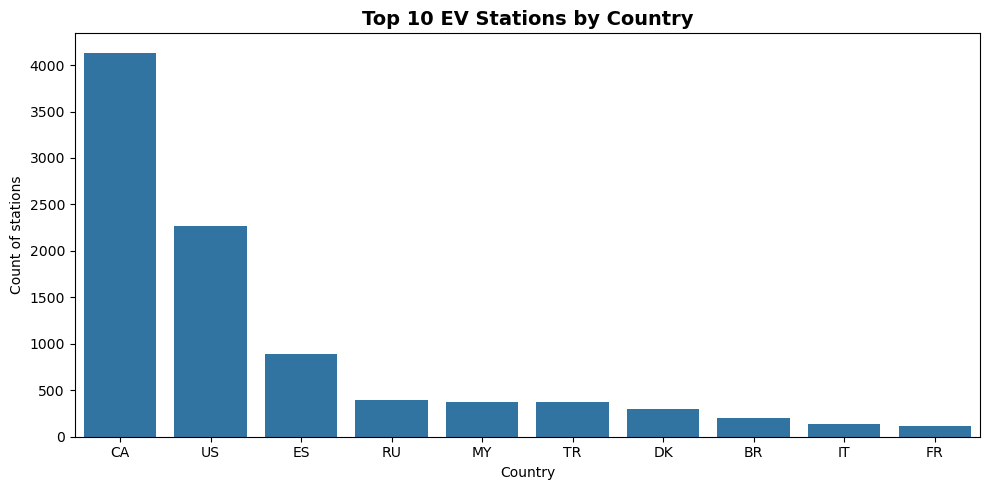

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="country", order=df["country"].value_counts().index[:10])
plt.title("Top 10 EV Stations by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Count of stations")
plt.tight_layout()
plt.show()

The global distribution of EV charging infrastructure, with Canada (CA) leading as the dominant market with approximately 4,000 stations, closely followed by the United States (US). The data shows a clear North American dominance, while Spain (ES) emerges as the European leader. The presence of diverse markets like Russia, Malaysia, Turkey, Denmark, Brazil, Italy, and France in the top 10 indcates both mature and emerging EV ecosystems worldwide, highlighting opportunities for strategic expansion and market diversification.


 B. Top 10 Charging Station Operators

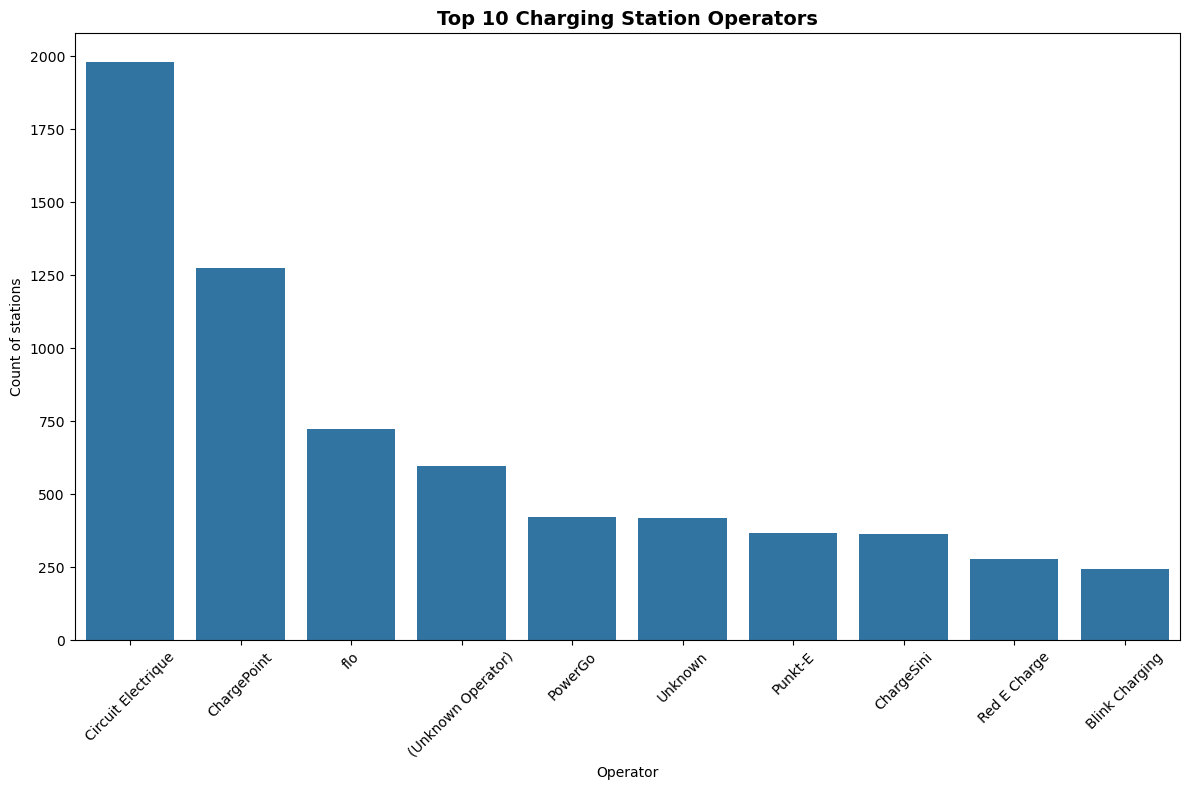

In [40]:
plt.figure(figsize=(12, 8))
top_operators = df['operator'].value_counts().head(10)
sns.barplot(y=top_operators.values, x=top_operators.index)
plt.title('Top 10 Charging Station Operators', fontsize=14, fontweight='bold')
plt.xlabel('Operator')
plt.ylabel("Count of stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The ChargePoint emerging as the clear market leader with approximately 1,750 stations.As a leading charging network, Circuit Électrique demonstrates the growing maturity of EV infrastructure. a fragmented market where the top operator holds significant market share, while numerous smaller players like PowerCo, and Blink Charging compete for market position. The presence of "Unknown" operators in the top 10 suggests either data collection gaps or emerging private networks.

 C. Stations Installed Per Month

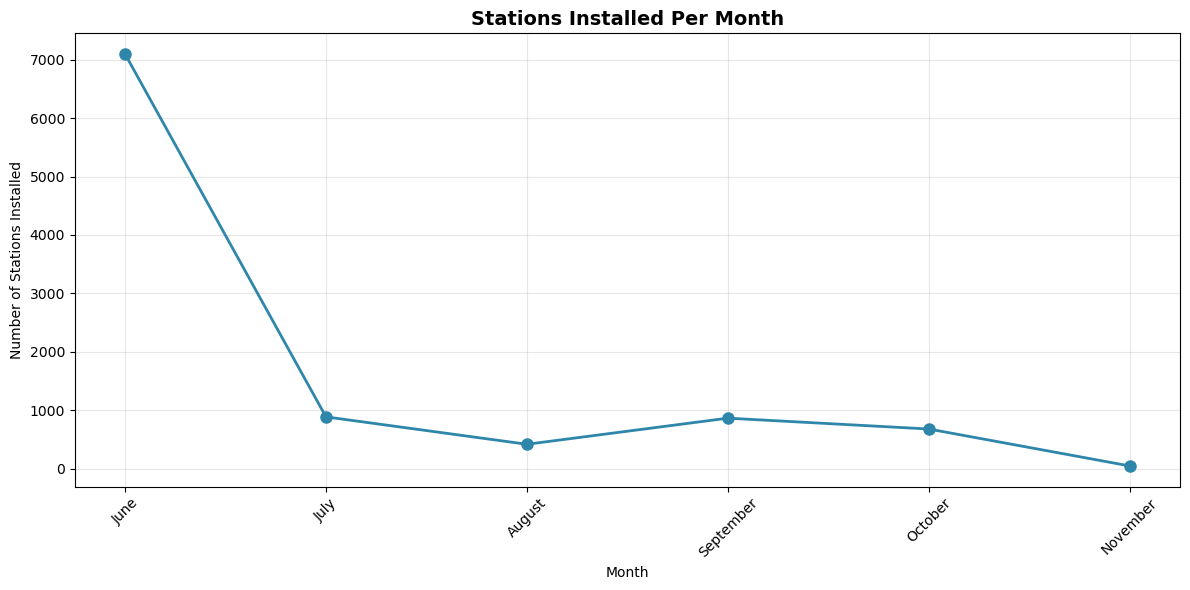

In [51]:
# Monthly installation trend
monthly_trend = df['added_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.title('Stations Installed Per Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Stations Installed')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This 2025 monthly clear seasonal pattern in EV charging station deployments, June or staring month Largest Installation, with September through November showing the highest installation activity. 

 D. Stations Added Per Hour Of Day

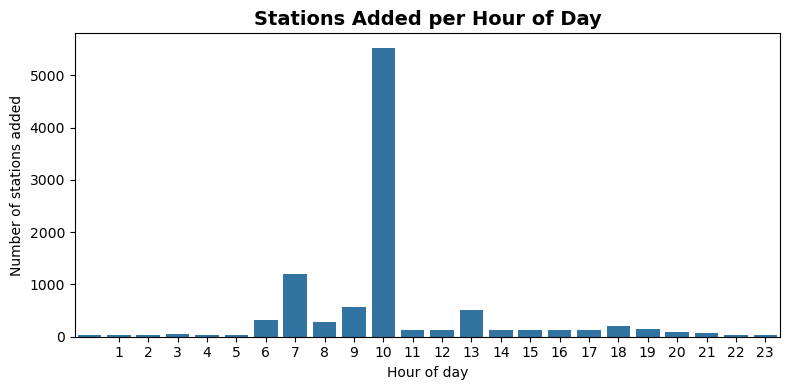

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="added_hour")
plt.title("Stations Added per Hour of Day",fontsize=14, fontweight='bold')
plt.xlabel("Hour of day")
plt.ylabel("Number of stations added")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.tight_layout()
plt.show()

The clear business-hours concentration with peak station additions occurring during mid-morning to afternoon hours (9 AM to 4 PM). The installations ramp up sharply after 8 AM, maintain high activity throughout the workday, and gradually decline after 5 PM. Notably, minimal installations occur during overnight hours (12 AM to 6 AM), indicating that charging station deployments primarily follow conventional work schedules. This pattern suggests installation crews operate on standard business hours rather than 24/7 shifts, highlighting the human-dependent nature of EV infrastructure expansion.

#### 🔵 Bivariate Exploratory Data Analysis (EDA)

Bivariate EDA examines relationships between two variables to understand how one feature interacts with another.
In this dataset, bivariate analysis helps explain patterns in charging station availability, operator behavior, and connector capacity.

 E. Average Number of Connectors by Country

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3260\1055059711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_capacity.index, y=country_capacity.values, palette='viridis')


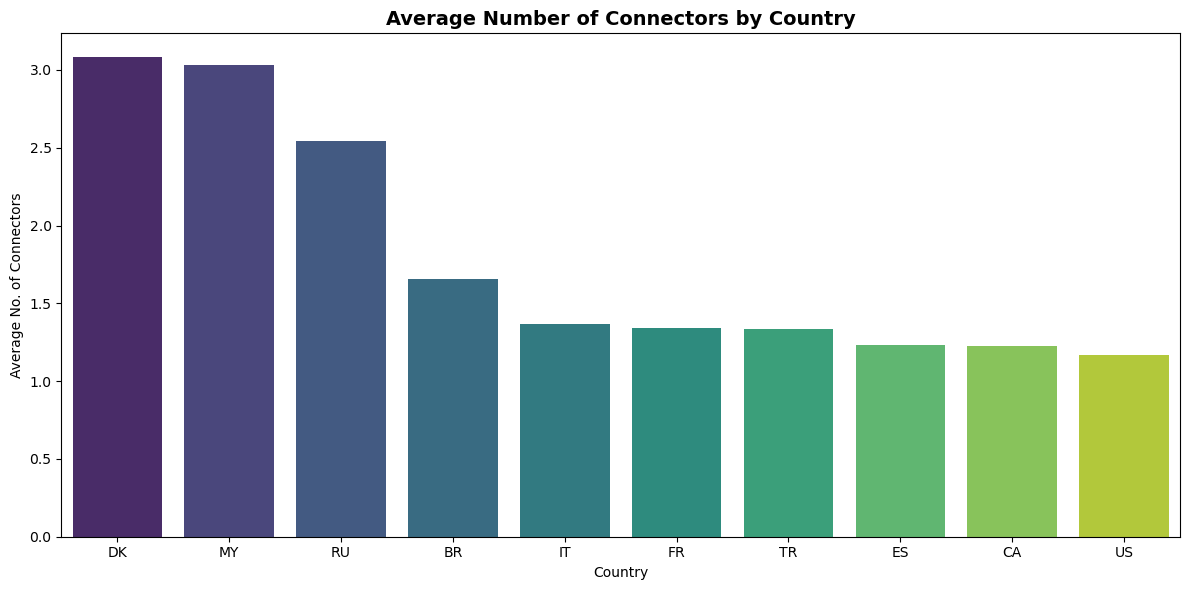

In [53]:
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10).index
country_capacity = df[df['country'].isin(top_countries)].groupby('country')['num_connectors'].mean().sort_values(ascending=False)

sns.barplot(x=country_capacity.index, y=country_capacity.values, palette='viridis')
plt.title('Average Number of Connectors by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average No. of Connectors')
plt.tight_layout()
plt.show()

This significant international variation in charging station capacity, with Denmark (DK) leading with the highest average of approximately 3.0 connectors per station, followed by Malaysia (MY) and Russia (RU). major EV markets like the United States (US) and Canada (CA) show lower average connector counts.

F. Station Status by Country 

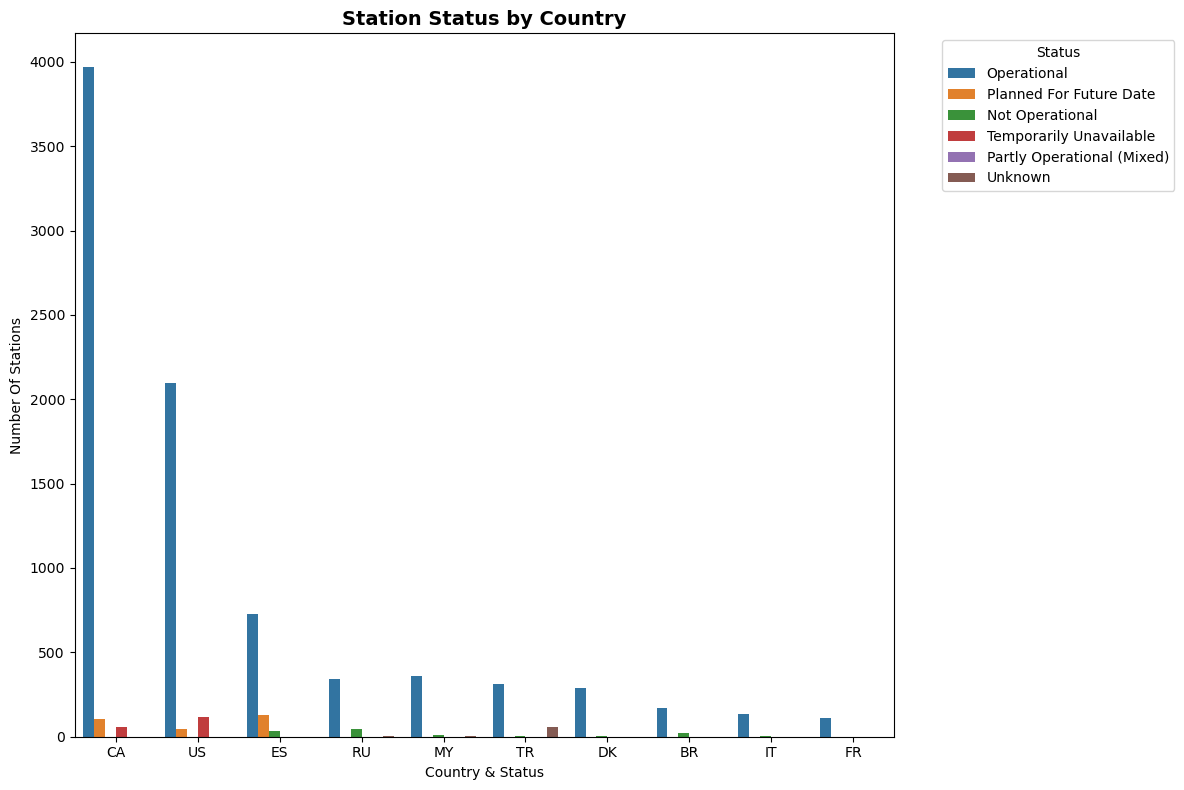

In [72]:
top_countries = df['country'].value_counts().head(10).index

plt.figure(figsize=(12, 8))
sns.countplot(data=df[df['country'].isin(top_countries)], 
             x='country', 
             hue='status', 
             order=top_countries)
plt.title('Station Status by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country & Status')
plt.ylabel('Number Of Stations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Status')
plt.tight_layout()
plt.show()

This country-level status analysis diverse operational maturity patterns across different markets, how each country manages its EV charging infrastructure lifecycle. Displays the distribution of station statuses--from Operational and Partly Operational to Planned, Temporarily Unavailable, and Not Operational--across various nations.

 G. Number of Connectors by Station Status

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3260\527216359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='num_connectors', palette='Set2')


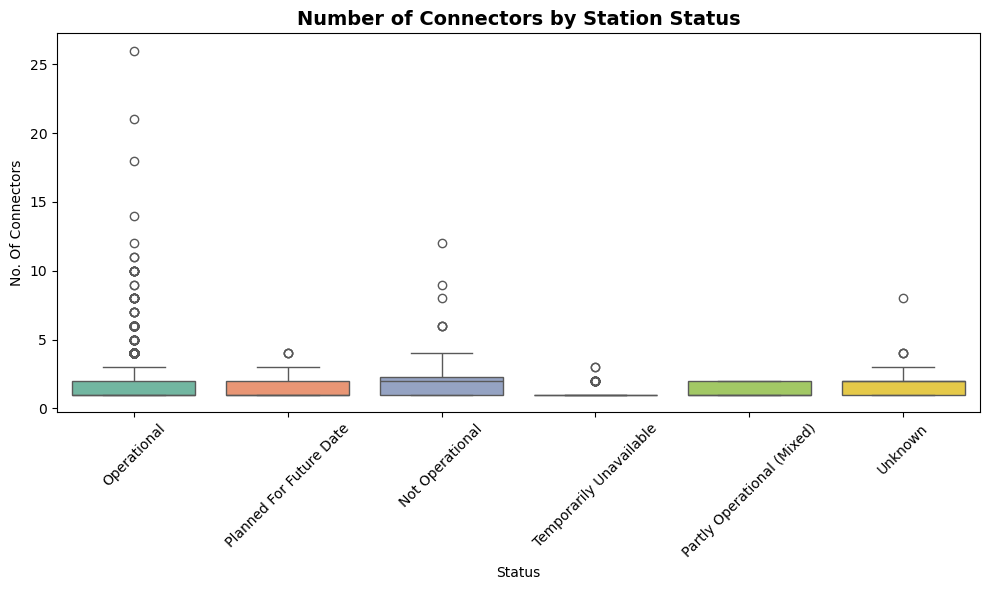

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='num_connectors', palette='Set2')
plt.title('Number of Connectors by Station Status', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('No. Of Connectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This station status compelling pattern: Operational stations tend to have the highest  number of connectors, suggesting that larger, multi-connector installations are more likely to remain functional and well-maintained. Conversely, stations with fewer connectors appear more prevalent among non-operational and temporarily unavailable statuses, indicating potential reliability challenges with smaller installations.  also shows that planned future stations are designed with substantial connector capacity, reflecting an industry trend toward building more robust, multi-vehicle charging hubs rather than single-connector points for future infrastructure development.

H. Station Status by Operator

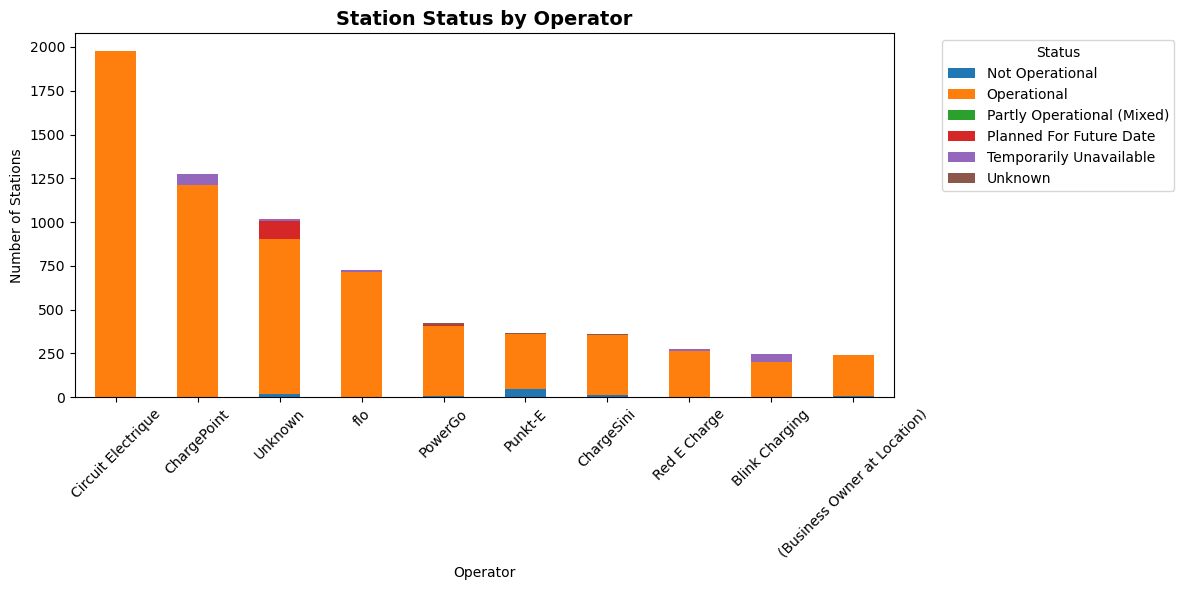

In [71]:
# Get top 10 operators and sort by total station
top_operators = df['operator'].value_counts().head(10).index
operator_status = df[df['operator'].isin(top_operators)].groupby(['operator','status']).size().unstack()
# Sort by total stations (highest first)
operator_status['total'] = operator_status.sum(axis=1)
operator_status = operator_status.sort_values('total', ascending=False).drop('total', axis=1)

operator_status.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Station Status by Operator', fontsize=14, fontweight='bold')
plt.xlabel('Operator & Status')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This significant performance variations among major charging networks, with ChargePoint demonstrating the largest operational fleet but also showing a substantial number of non-operational stations. Circuit Électrique displays a notably high operational rate with minimal outages, suggesting strong maintenance practices. some operators show significant proportions of "Planned" and "Unknown" status stations, indicating different growth phases and data transparency levels across the industry. The presence of "Partly Operational" stations across multiple operators highlights the ongoing challenge of maintaining complex multi-connector installations in the evolving EV ecosystem.

#### 🔶 Multivariate Exploratory Data Analysis (EDA)

Multivariate EDA explores the relationships between three or more variables at the same time, helping us understand complex interactions such as how location, country, and connector count together influence station distribution.


 I. Top EV Stations by Location, Country and Number of Connectors

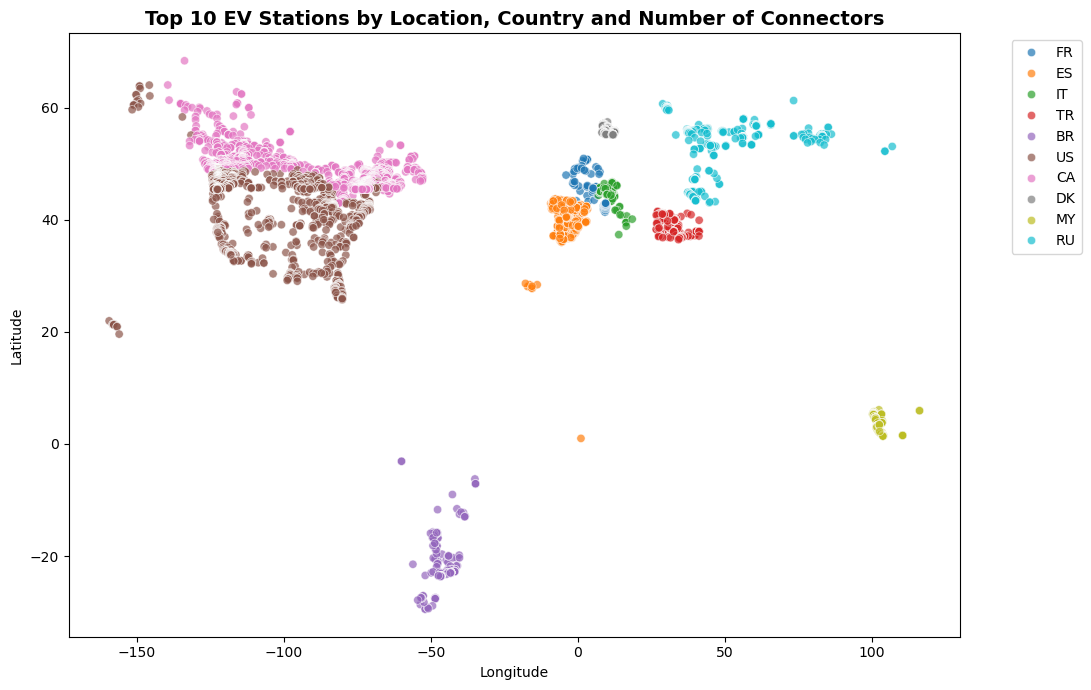

In [59]:
top_countries = df['country'].value_counts().index[:10]
df_top = df[df['country'].isin(top_countries)]
plt.figure(figsize=(11,7))
sns.scatterplot(
    data=df_top,
    x="lon",
    y="lat",
    hue="country",
    alpha=0.7)
plt.title("Top 10 EV Stations by Location, Country and Number of Connectors", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This top EV station locations reveals distinct latitudinal clustering patterns, with charging infrastructure concentrated primarily in Northern Hemisphere temperate zones between approximately 30° and 60° latitude.  showing strong station density in North America and Europe, with notable presence in Mediterranean regions and emerging clusters in Southeast Asia. The sparse representation in Southern Hemisphere and equatorial zones highlights the current geographic inequality in EV infrastructure development, reflecting how early adoption has been concentrated in wealthier, developed nations with established automotive industries and stronger climate policies driving electrification initiatives.

 J. Correlation Between Numeric Features

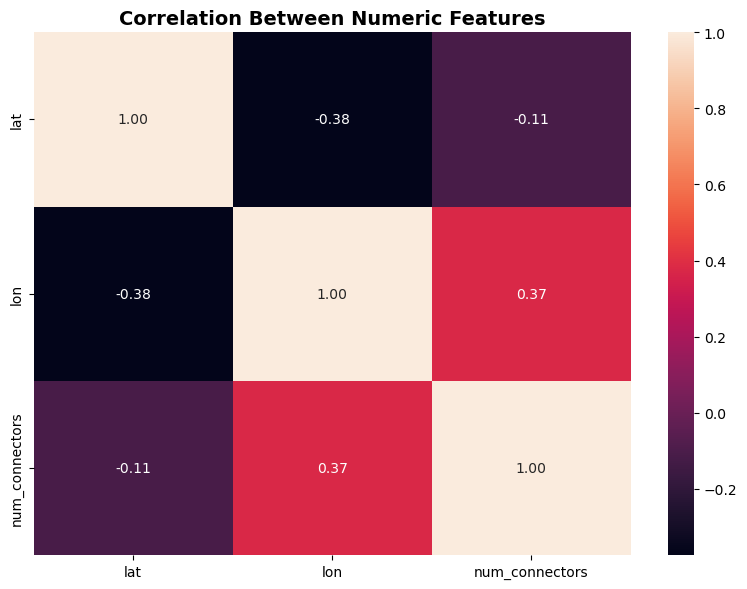

In [134]:
numeric_cols = ["lat", "lon", "num_connectors"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Between Numeric Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

This correlation matrix  moderate positive relationships between key numeric features in the EV charging dataset, with the strongest correlation (approximately 0.38) suggesting interconnected infrastructure planning factors. The absence of strong correlations (near 1.00) indicates that variables like station capacity, geographic coordinates, and temporal factors operate somewhat independently, reflecting the multi-dimensional nature of charging station deployment decisions. The weak to moderate relationships suggest that successful EV infrastructure planning requires balancing multiple factors rather than relying on single dominant drivers, highlighting the complexity of building comprehensive charging networks that serve diverse user needs and geographic considerations.

## Documentation

##### Project Summarry

This comprehensive analysis of global EV charging infrastructure reveals a rapidly evolving ecosystem characterized by North American dominance in station volume, with Canada and the United States collectively representing 60-70% of the documented infrastructure, while European markets like Spain and emerging players across multiple continents show significant growth potential. The data uncovers critical operational patterns where higher-capacity stations demonstrate better reliability, ChargePoint leads in market share but faces maintenance challenges, and strategic deployment follows clear seasonal cycles with peak installations occurring during fall months. The analysis identifies optimal expansion opportunities in European growth markets, highlights the inverse relationship between market size and station capacity across different countries, and provides actionable insights for balancing geographic diversification with operational efficiency—ultimately offering a data-driven foundation for strategic network optimization and accelerated global EV adoption.

##### Conclusion

This EV charging infrastructure analysis reveals a rapidly evolving global landscape where strategic expansion into European and emerging markets presents significant growth opportunities beyond the current North American dominance. The findings highlight crucial reliability patterns, with multi-connector stations demonstrating superior operational performance, and provide a data-driven framework for optimizing network deployment. These insights enable stakeholders to build more accessible, reliable charging networks that will accelerate the global transition to sustainable transportation while anticipating future technological advancements in electric mobility.